In [13]:
import sys
import random
sys.path.append('../src/')
from random_graph import RandGraph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
g = RandGraph(graph_type='simple')

In [19]:
g.action()

(array([[ 0.14285714,  0.16666667,  0.        ,  0.        ]]), 0.0)

In [20]:
g.graph.nodes(data=True)

NodeDataView({1: {'actors': [b'8847ba00']}, 2: {'actors': [b'6cd7e381']}, 3: {'actors': [b'8847ba00'], 'capacity': 7}, 4: {'actors': [b'6cd7e381'], 'capacity': 6}, 5: {'actors': None, 'capacity': 2}, 6: {'actors': None, 'capacity': 2}, 7: {'actors': None}})

In [21]:
g.graph.edges

OutEdgeView([(1, 3), (2, 4), (3, 5), (4, 5), (5, 6), (6, 7)])

In [29]:
g.graph.nodes()[3]

{'actors': [b'8847ba00'], 'capacity': 7}

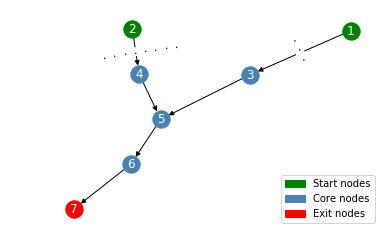

In [40]:
pos = nx.kamada_kawai_layout(g.graph)
nx.draw_networkx_nodes(g.graph,
                               pos,
                               node_color='steelblue',
                               nodelist=g.core_nodes)
nx.draw_networkx_nodes(g.graph,
                       pos,
                       node_color='g',
                       nodelist=g.entry_nodes)
nx.draw_networkx_nodes(g.graph,
                       pos,
                       node_color='r',
                       nodelist=g.exit_nodes)

nx.draw_networkx_labels(g.graph, pos, font_color='w')
nx.draw_networkx_edges(g.graph, pos)
nx.draw_networkx_edge_labels(g.graph, pos, edge_labels={
    (1,3):'.\n'*3,
    (2,4):'.\n'*8
}, font_size=8, font_weight='bold')
plt.axis('off')
#legend
blue_patch = mpatches.Patch(color='steelblue', label='Core nodes')
red_patch = mpatches.Patch(color='r', label='Exit nodes')
green_patch = mpatches.Patch(color='g', label='Start nodes')

plt.legend(handles=[green_patch,blue_patch,red_patch])
plt.show()